# Lab: Classification Trees

The purpose of this lab is to start getting some practice using Scikit-Learn to build classification 
trees.  

---
Instructions:
1. Explain why decision trees are non-parametric models.


2. Create a Python file.  Use this code to read and preprocess the data.  (see number 7 for 
how to install graphviz)



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import graphviz
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/College.csv', 
index_col=0)

In [4]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


3. Convert the 'Private' column to an numeric column with values 0 and 1 (1 for private 
colleges).


In [13]:
df['Private'] =(df['Private'] == 'Yes').astype('int')

4. Do a little exploration of the data to remember what it’s like.  E.g., use df.info(), 
df.describe().


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [17]:
df.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [23]:
df['Private'].value_counts()

1    565
0    212
Name: Private, dtype: int64

5. We will try to predict whether a college is public or private.  Select a few predictors, 
create NumPy arrays X and y, and then do a training/test split.  Try hard to remember 
how to do this from memory.  If you can't, refer to the hints.


In [35]:
predictors = ['Outstate', 'Room.Board', 'Books', 'F.Undergrad']
X = df[predictors].values
y = df['Private'].values

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

6. Train a tree classifier using Scikit-Learn's DecisionTreeClassifier.  Use the training data 
you created in the previous step.


In [36]:
DT = DecisionTreeClassifier(max_depth=3, random_state=0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

7. Install graphviz by entering conda install python-graphviz at the Anaconda prompt.  Then 
plot your tree using graphviz.  Try playing with some of the options of export_graphviz(). 


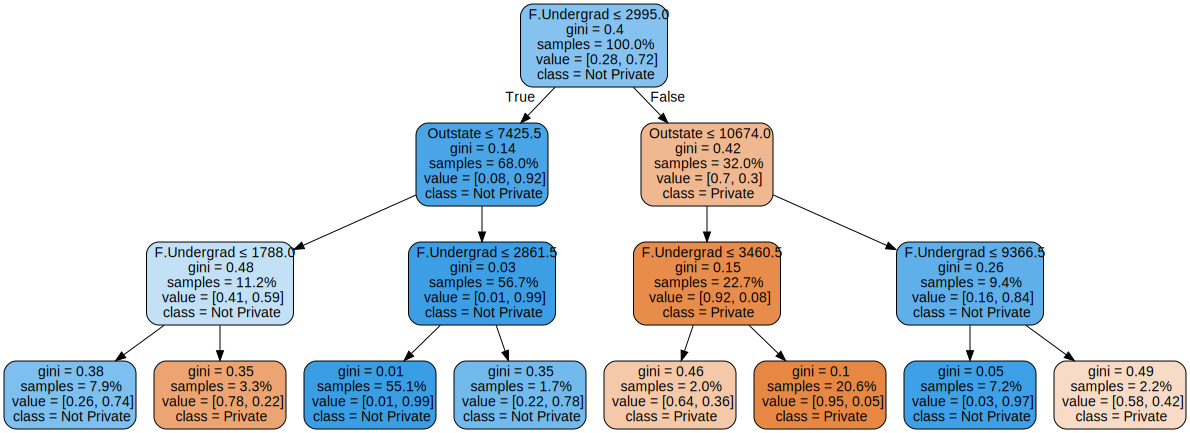

In [51]:
classifications = ['Private', 'Not Private']
dot_data = export_graphviz(DT, precision=2,
                 feature_names=predictors,  
                 proportion=True,  
                 filled=True, rounded=True,  
                 special_characters=True,
                 class_names=classes)
# plot it
graph = graphviz.Source(dot_data)  
graph

8. Use your classification tree to predict whether examples in your test data are public or 
private.  Compute the confusion matrix and the accuracy of your predictions..


In [53]:
predictions = pd.Series(DT.predict(x_test), name='Predicted')
actual = pd.Series(y_test, name='Actual')
pd.crosstab(actual, predictions)

Predicted,0,1
Actual,,
0,53,9
1,6,166


9. If you still have time, do the following:
● try building more classification trees, using different sets of input features
● look at, and play with, the hyperparameters available in DecisionTreeClassifier, 
especially max_depth.
● see how much the classification tree that you produce depends on your particular 
training set

In [54]:
DT = DecisionTreeClassifier(max_depth=5, random_state=0)
DT.fit(X_train,y_train)
predictions = pd.Series(DT.predict(x_test), name='Predicted')
actual = pd.Series(y_test, name='Actual')
pd.crosstab(actual, predictions)

Predicted,0,1
Actual,,
0,52,10
1,7,165


In [55]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [63]:
predictors = ['Outstate', 'Room.Board', 'Books', 'F.Undergrad', 'Apps', 'Accept', 'Enroll', 'Grad.Rate']
X = df[predictors].values
y = df['Private'].values

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
DT = DecisionTreeClassifier(max_depth=7, random_state=0)
DT.fit(X_train,y_train)
predictions = pd.Series(DT.predict(x_test), name='Predicted')
actual = pd.Series(y_test, name='Actual')
pd.crosstab(actual, predictions)

Predicted,No,Yes
Actual,,
No,51,11
Yes,5,167


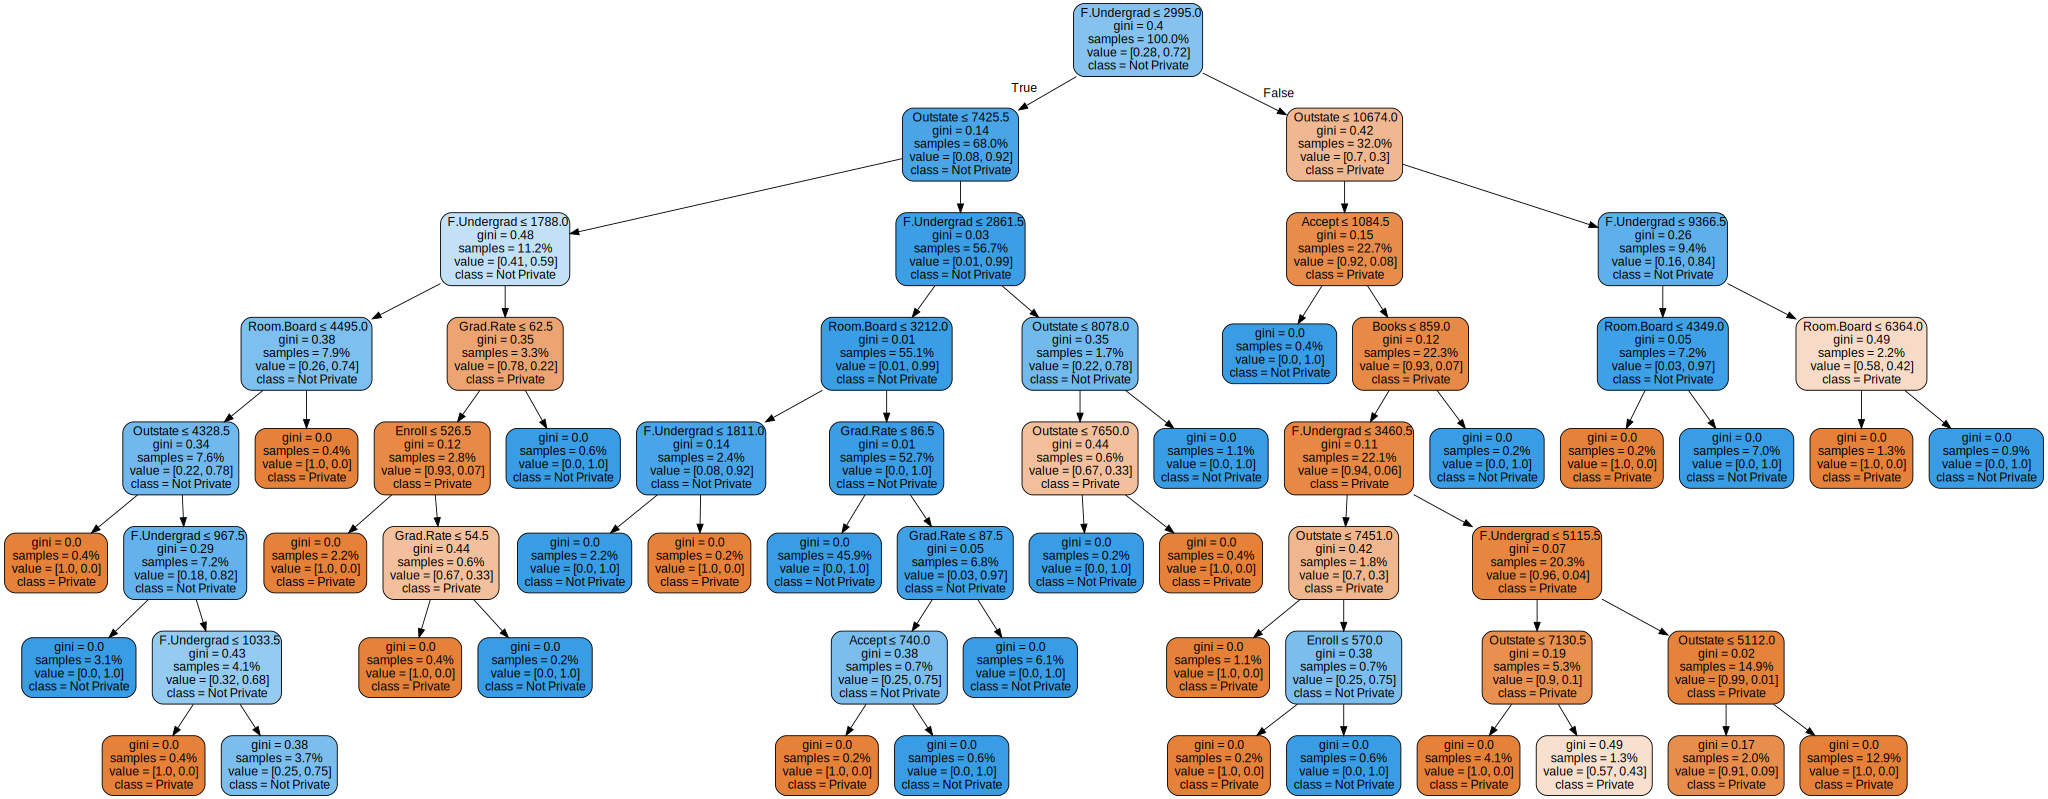

In [64]:
classifications = ['Private', 'Not Private']
dot_data = export_graphviz(DT, precision=2,
                 feature_names=predictors,  
                 proportion=True,  
                 filled=True, rounded=True,  
                 special_characters=True,
                 class_names=classes)
# plot it
graph = graphviz.Source(dot_data)  
graph